# Preparation

In [ ]:
!pip install geopandas

     |████████████████████████████████| 1.0 MB 13.1 MB/s 
     |████████████████████████████████| 6.3 MB 55.0 MB/s 
     |████████████████████████████████| 16.7 MB 63.7 MB/s 


In [ ]:
import pandas as pd
import numpy as np
import geopandas as gpd

import matplotlib.cm as cm
%matplotlib inline

import urllib
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import MinMaxScaler

#Load Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path = '/content/drive/MyDrive/Colab Notebooks/Motor_Vehicle_Collisions_Crashes.csv'
pd.set_option('display.max_columns', None)
df = pd.read_csv(path)
df.head()

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,04/14/2021,5:32,NaN,NaN,NaN,NaN,NaN,BRONX WHITESTONE BRIDGE,NaN,NaN,0.0,0.0,0,0,0,0,0,0,Following Too Closely,Unspecified,NaN,NaN,NaN,4407480,Sedan,Sedan,NaN,NaN,NaN
1,04/13/2021,21:35,BROOKLYN,11217.0,40.68358,-73.97617,"(40.68358, -73.97617)",NaN,NaN,620 ATLANTIC AVENUE,1.0,0.0,1,0,0,0,0,0,Unspecified,NaN,NaN,NaN,NaN,4407147,Sedan,NaN,NaN,NaN,NaN
2,04/15/2021,16:15,NaN,NaN,NaN,NaN,NaN,HUTCHINSON RIVER PARKWAY,NaN,NaN,0.0,0.0,0,0,0,0,0,0,Pavement Slippery,NaN,NaN,NaN,NaN,4407665,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN
3,04/13/2021,16:00,BROOKLYN,11222.0,NaN,NaN,NaN,VANDERVORT AVENUE,ANTHONY STREET,NaN,0.0,0.0,0,0,0,0,0,0,Following Too Closely,Unspecified,NaN,NaN,NaN,4407811,Sedan,NaN,NaN,NaN,NaN
4,04/12/2021,8:25,NaN,NaN,0.00000,0.00000,"(0.0, 0.0)",EDSON AVENUE,NaN,NaN,0.0,0.0,0,0,0,0,0,0,Unspecified,Unspecified,NaN,NaN,NaN,4406885,Station Wagon/Sport Utility Vehicle,Sedan,NaN,NaN,NaN


In [ ]:
df.columns

Index(['CRASH DATE', 'CRASH TIME', 'BOROUGH', 'ZIP CODE', 'LATITUDE',
       'LONGITUDE', 'LOCATION', 'ON STREET NAME', 'CROSS STREET NAME',
       'OFF STREET NAME', 'NUMBER OF PERSONS INJURED',
       'NUMBER OF PERSONS KILLED', 'NUMBER OF PEDESTRIANS INJURED',
       'NUMBER OF PEDESTRIANS KILLED', 'NUMBER OF CYCLIST INJURED',
       'NUMBER OF CYCLIST KILLED', 'NUMBER OF MOTORIST INJURED',
       'NUMBER OF MOTORIST KILLED', 'CONTRIBUTING FACTOR VEHICLE 1',
       'CONTRIBUTING FACTOR VEHICLE 2', 'CONTRIBUTING FACTOR VEHICLE 3',
       'CONTRIBUTING FACTOR VEHICLE 4', 'CONTRIBUTING FACTOR VEHICLE 5',
       'COLLISION_ID', 'VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2',
       'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4', 'VEHICLE TYPE CODE 5'],
      dtype='object')

#Data Preprocessing

In [ ]:
df1 = df.copy()

In [ ]:
df1.shape

(1882293, 29)

In [ ]:
df1.drop_duplicates(subset=['COLLISION_ID'],inplace=True)
df1.dropna(subset=['COLLISION_ID', 'CRASH DATE', 'CRASH TIME'],inplace=True)
df1.shape

(1882293, 29)

In [ ]:
df1['CRASH DATE'] = pd.to_datetime(df1['CRASH DATE'])
df1['CRASH TIME'] = pd.to_datetime(df1['CRASH TIME'])

In [ ]:
df1['Date'] = df1['CRASH DATE'].dt.date
df1['Month'] = df1['CRASH DATE'].dt.month
df1['Year'] = df1['CRASH DATE'].dt.year
df1['DOW'] = df1['CRASH DATE'].dt.dayofweek
df1['Hour'] = df1['CRASH TIME'].dt.hour
df1['Day'] = df1['CRASH DATE'].dt.dayofyear

In [ ]:
df1['NUMBER OF PERSONS INJURED'] = df1['NUMBER OF PERSONS INJURED'].fillna(0)
df1['NUMBER OF PERSONS KILLED'] = df1['NUMBER OF PERSONS KILLED'].fillna(0)
df1['NUMBER OF PEDESTRIANS INJURED'] = df1['NUMBER OF PEDESTRIANS INJURED'].fillna(0)
df1['NUMBER OF PEDESTRIANS KILLED'] = df1['NUMBER OF PEDESTRIANS KILLED'].fillna(0)
df1['NUMBER OF CYCLIST INJURED'] = df1['NUMBER OF CYCLIST INJURED'].fillna(0)
df1['NUMBER OF CYCLIST KILLED'] = df1['NUMBER OF CYCLIST KILLED'].fillna(0)
df1['NUMBER OF MOTORIST INJURED'] = df1['NUMBER OF MOTORIST INJURED'].fillna(0)
df1['NUMBER OF MOTORIST KILLED'] = df1['NUMBER OF MOTORIST KILLED'].fillna(0)

In [ ]:
df1 = df1.replace('Unspecified', '')

df1['VEHICLE TYPE CODE 1'] = df1['VEHICLE TYPE CODE 1'].fillna('')
df1['VEHICLE TYPE CODE 2'] = df1['VEHICLE TYPE CODE 2'].fillna('')
df1['VEHICLE TYPE CODE 3'] = df1['VEHICLE TYPE CODE 3'].fillna('')
df1['VEHICLE TYPE CODE 4'] = df1['VEHICLE TYPE CODE 4'].fillna('')
df1['VEHICLE TYPE CODE 5'] = df1['VEHICLE TYPE CODE 5'].fillna('')

df1['CONTRIBUTING FACTOR VEHICLE 1'] = df1['CONTRIBUTING FACTOR VEHICLE 1'].fillna('')
df1['CONTRIBUTING FACTOR VEHICLE 2'] = df1['CONTRIBUTING FACTOR VEHICLE 2'].fillna('')
df1['CONTRIBUTING FACTOR VEHICLE 3'] = df1['CONTRIBUTING FACTOR VEHICLE 3'].fillna('')
df1['CONTRIBUTING FACTOR VEHICLE 4'] = df1['CONTRIBUTING FACTOR VEHICLE 4'].fillna('')
df1['CONTRIBUTING FACTOR VEHICLE 5'] = df1['CONTRIBUTING FACTOR VEHICLE 5'].fillna('')

In [ ]:
# 筛选 zipcode & year(2018-2020)
df1.dropna(subset=['ZIP CODE'],inplace=True)
df1 = df1.loc[df1['Year'].isin([2018,2019,2020])]

In [ ]:
df1.head()

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5,Date,Month,Year,DOW,Hour,Day
13,2019-05-21,2022-04-27 22:50:00,BROOKLYN,11201.0,40.69754,-73.983120,"(40.69754, -73.98312)",GOLD STREET,CONCORD STREET,NaN,0.0,0.0,0,0,0,0,0,0,Passing or Lane Usage Improper,,,,,4136992,�MBU,Taxi,,,,2019-05-21,5,2019,1,22,141
1032,2020-04-17,2022-04-27 01:50:00,MANHATTAN,10019.0,40.77161,-73.990460,"(40.77161, -73.99046)",11 AVENUE,WEST 59 STREET,NaN,1.0,0.0,0,0,0,0,1,0,Driver Inattention/Distraction,,,,,4408441,Sedan,,,,,2020-04-17,4,2020,4,1,108
4573,2020-05-02,2022-04-27 17:30:00,QUEENS,11436.0,40.67376,-73.794730,"(40.67376, -73.79473)",ROCKAWAY BOULEVARD,144 STREET,NaN,0.0,0.0,0,0,0,0,0,0,Unsafe Lane Changing,,,,,4412513,Station Wagon/Sport Utility Vehicle,Pick-up Truck,,,,2020-05-02,5,2020,5,17,123
4964,2020-12-31,2022-04-27 12:06:00,MANHATTAN,10036.0,40.76020,-73.996864,"(40.7602, -73.996864)",NaN,NaN,524 WEST 42 STREET,0.0,0.0,0,0,0,0,0,0,Driver Inattention/Distraction,,,,,4411898,Station Wagon/Sport Utility Vehicle,Box Truck,,,,2020-12-31,12,2020,3,12,366
8263,2020-05-10,2022-04-27 00:51:00,MANHATTAN,10032.0,40.84103,-73.944630,"(40.84103, -73.94463)",WEST 165 STREET,RIVERSIDE DRIVE,NaN,2.0,0.0,0,0,0,0,2,0,Pavement Slippery,,,,,4415453,AMBULANCE,Sedan,Station Wagon/Sport Utility Vehicle,,,2020-05-10,5,2020,6,0,131


# Dataset Reconstruction

### Traffic Volume

In [ ]:
volume = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/volume.csv')
volume.head()

,ZIP CODE,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
0,10001,22630.0,15212.0,11802.0,10823.0,14653.0,28577.0,39340.0,47155.0,53557.0,53442.0,55180.0,58121.0,60114,62146,65692,68274,68608,66450,62863,57751,51562,45784,39202,30601
1,10002,63983.0,42964.0,31646.0,26457.0,27664.0,41705.0,84487.0,104340.0,113507.0,112823.0,108510.0,111555.0,115556,117983,124592,126874,125592,129978,126464,119293,114992,105555,97702,81125
2,10003,57053.0,46494.0,37153.0,30833.0,24488.0,27261.0,38531.0,53105.0,63287.0,69299.0,72793.0,76262.0,78968,81390,84177,84114,85524,90560,93122,92637,86414,78464,68525,62015
3,10004,19408.0,13840.0,9190.0,7675.0,9008.0,15818.0,34173.0,45156.0,46411.0,44781.0,41528.0,41911.0,41667,43840,46506,49117,50987,51720,49685,44587,36996,32074,28347,23722
4,10007,3825.0,2849.0,2221.0,1825.0,1811.0,2335.0,6015.0,8482.0,10384.0,11090.0,9717.0,10367.0,10415,10415,11004,11897,11796,12121,11443,9505,8854,8801,7457,5041


In [ ]:
df_volume = df1.copy()

In [ ]:
df_volume["ZIP CODE"] = df_volume["ZIP CODE"].astype(int).astype(str)
df_volume["ZIP CODE"] = df_volume.loc[:, "ZIP CODE"].apply(lambda line: line.replace(' ', ''))
df_volume = df_volume.loc[df_volume["ZIP CODE"] != '']

In [ ]:
def applyFunc(line):
    a = volume.loc[volume["ZIP CODE"] == int(line["ZIP CODE"]), str(line['Hour'])]
    if a.empty:
        return None
    else:
        return a.item()

In [ ]:
df_volume['Volume'] = df_volume[['ZIP CODE','Hour']].apply(applyFunc,axis = 1)
df_volume.head(3)

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5,Date,Month,Year,DOW,Hour,Day,volume,Volume
13,2019-05-21,2022-04-27 22:50:00,BROOKLYN,11201,40.69754,-73.98312,"(40.69754, -73.98312)",GOLD STREET,CONCORD STREET,NaN,0.0,0.0,0,0,0,0,0,0,Passing or Lane Usage Improper,,,,,4136992,�MBU,Taxi,,,,2019-05-21,5,2019,1,22,141,149350.0,149350.0
1032,2020-04-17,2022-04-27 01:50:00,MANHATTAN,10019,40.77161,-73.99046,"(40.77161, -73.99046)",11 AVENUE,WEST 59 STREET,NaN,1.0,0.0,0,0,0,0,1,0,Driver Inattention/Distraction,,,,,4408441,Sedan,,,,,2020-04-17,4,2020,4,1,108,29933.0,29933.0
4573,2020-05-02,2022-04-27 17:30:00,QUEENS,11436,40.67376,-73.79473,"(40.67376, -73.79473)",ROCKAWAY BOULEVARD,144 STREET,NaN,0.0,0.0,0,0,0,0,0,0,Unsafe Lane Changing,,,,,4412513,Station Wagon/Sport Utility Vehicle,Pick-up Truck,,,,2020-05-02,5,2020,5,17,123,58703.0,58703.0


### Weather

In [ ]:
weather = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/weather data.csv')
weather.head(3)

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,AWND,AWND_ATTRIBUTES,PGTM,PGTM_ATTRIBUTES,PRCP,PRCP_ATTRIBUTES,SNOW,SNOW_ATTRIBUTES,SNWD,SNWD_ATTRIBUTES,TAVG,TAVG_ATTRIBUTES,TMAX,TMAX_ATTRIBUTES,TMIN,TMIN_ATTRIBUTES,TSUN,TSUN_ATTRIBUTES,WDF2,WDF2_ATTRIBUTES,WDF5,WDF5_ATTRIBUTES,WSF2,WSF2_ATTRIBUTES,WSF5,WSF5_ATTRIBUTES,WT01,WT01_ATTRIBUTES,WT02,WT02_ATTRIBUTES,WT03,WT03_ATTRIBUTES,WT04,WT04_ATTRIBUTES,WT05,WT05_ATTRIBUTES,WT06,WT06_ATTRIBUTES,WT08,WT08_ATTRIBUTES
0,USW00094728,"NY CITY CENTRAL PARK, NY US",40.77898,-73.96925,42.7,2018-01-01,7.83,",,W",NaN,NaN,0.0,",,W,2400",0.0,",,W,2400",0.0,"T,,W,2400",NaN,NaN,19,",,W",7,",,W",NaN,NaN,300.0,",,W",300.0,",,W",15.0,",,W",25.1,",,W",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,USW00094728,"NY CITY CENTRAL PARK, NY US",40.77898,-73.96925,42.7,2018-01-02,8.05,",,W",NaN,NaN,0.0,",,W,2400",0.0,",,W,2400",0.0,",,W,2400",NaN,NaN,26,",,W",13,",,W",NaN,NaN,260.0,",,W",250.0,",,W",16.1,",,W",28.0,",,W",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,USW00094728,"NY CITY CENTRAL PARK, NY US",40.77898,-73.96925,42.7,2018-01-03,3.13,",,W",NaN,NaN,0.0,",,W,2400",0.0,",,W,2400",0.0,"T,,W,2400",NaN,NaN,30,",,W",16,",,W",NaN,NaN,260.0,",,W",270.0,",,W",14.1,",,W",21.9,",,W",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
weather = weather.loc[:, ['DATE','TMAX','PRCP','SNOW']]
weather.head(3)

,DATE,TMAX,PRCP,SNOW
0,2018-01-01,19,0.0,0.0
1,2018-01-02,26,0.0,0.0
2,2018-01-03,30,0.0,0.0


In [ ]:
weather['DATE'] = pd.to_datetime(weather['DATE'])

In [ ]:
df_weather = df_volume.merge(weather, left_on = 'CRASH DATE', right_on = 'DATE').drop(columns=['DATE'])
df_weather.head(3)

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5,Date,Month,Year,DOW,Hour,Day,volume,Volume,TMAX,PRCP,SNOW
0,2019-05-21,2022-04-27 22:50:00,BROOKLYN,11201,40.697540,-73.983120,"(40.69754, -73.98312)",GOLD STREET,CONCORD STREET,NaN,0.0,0.0,0,0,0,0,0,0,Passing or Lane Usage Improper,,,,,4136992,�MBU,Taxi,,,,2019-05-21,5,2019,1,22,141,149350.0,149350.0,71,0.0,0.0
1,2019-05-21,2022-04-27 07:45:00,BROOKLYN,11223,40.588398,-73.967926,"(40.588398, -73.967926)",NaN,NaN,2507 EAST 2 STREET,0.0,0.0,0,0,0,0,0,0,,,,,,4136803,Station Wagon/Sport Utility Vehicle,,,,,2019-05-21,5,2019,1,7,141,49539.0,49539.0,71,0.0,0.0
2,2019-05-21,2022-04-27 08:00:00,QUEENS,11362,40.755604,-73.728660,"(40.755604, -73.72866)",NaN,NaN,63-05 MARATHON PARKWAY,0.0,0.0,0,0,0,0,0,0,Driver Inattention/Distraction,,,,,4135881,Station Wagon/Sport Utility Vehicle,Sedan,,,,2019-05-21,5,2019,1,8,141,32775.0,32775.0,71,0.0,0.0


### Contributing Factor & Vehicle Type

In [ ]:
df2 = df_weather.copy()
df2['ZIP CODE'] = df2['ZIP CODE'].astype(int)
df2 = df_weather.loc[:, ['COLLISION_ID','ZIP CODE','Date','Year','Month','DOW','Day','Hour','Volume','TMAX','PRCP','SNOW',
                         'CONTRIBUTING FACTOR VEHICLE 1','CONTRIBUTING FACTOR VEHICLE 2', 'CONTRIBUTING FACTOR VEHICLE 3',
                         'CONTRIBUTING FACTOR VEHICLE 4', 'CONTRIBUTING FACTOR VEHICLE 5',
                         'VEHICLE TYPE CODE 1','VEHICLE TYPE CODE 2','VEHICLE TYPE CODE 3',
                         'VEHICLE TYPE CODE 4','VEHICLE TYPE CODE 5',
                         'NUMBER OF PERSONS INJURED','NUMBER OF PERSONS KILLED']].reset_index(drop=True)
df2.head()

,COLLISION_ID,ZIP CODE,Date,Year,Month,DOW,Day,Hour,Volume,TMAX,PRCP,SNOW,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED
0,4136992,11201,2019-05-21,2019,5,1,141,22,149350.0,71,0.0,0.0,Passing or Lane Usage Improper,,,,,�MBU,Taxi,,,,0.0,0.0
1,4136803,11223,2019-05-21,2019,5,1,141,7,49539.0,71,0.0,0.0,,,,,,Station Wagon/Sport Utility Vehicle,,,,,0.0,0.0
2,4135881,11362,2019-05-21,2019,5,1,141,8,32775.0,71,0.0,0.0,Driver Inattention/Distraction,,,,,Station Wagon/Sport Utility Vehicle,Sedan,,,,0.0,0.0
3,4136313,11377,2019-05-21,2019,5,1,141,17,175863.0,71,0.0,0.0,Driver Inattention/Distraction,,,,,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,,,,1.0,0.0
4,4136664,10018,2019-05-21,2019,5,1,141,16,12960.0,71,0.0,0.0,Driver Inattention/Distraction,,,,,Taxi,Sedan,Sedan,,,3.0,0.0


In [ ]:
# Vehicle Type

df3 = []

for i in range(len(df2)):
  if df2['VEHICLE TYPE CODE 1'][i] != '':
    df3.append([df2['COLLISION_ID'][i], df2['ZIP CODE'][i], df2['Year'][i], df2['Month'][i], df2['DOW'][i], df2['Day'][i], df2['Hour'][i], df2['VEHICLE TYPE CODE 1'][i], df2['NUMBER OF PERSONS INJURED'][i], df2['NUMBER OF PERSONS KILLED'][i], df2['Volume'][i], df2['TMAX'][i], df2['PRCP'][i], df2['SNOW'][i]])
  if df2['VEHICLE TYPE CODE 2'][i] != '':
    df3.append([df2['COLLISION_ID'][i], df2['ZIP CODE'][i], df2['Year'][i], df2['Month'][i], df2['DOW'][i], df2['Day'][i], df2['Hour'][i], df2['VEHICLE TYPE CODE 2'][i], df2['NUMBER OF PERSONS INJURED'][i], df2['NUMBER OF PERSONS KILLED'][i], df2['Volume'][i], df2['TMAX'][i], df2['PRCP'][i], df2['SNOW'][i]])
  if df2['VEHICLE TYPE CODE 3'][i] != '':
    df3.append([df2['COLLISION_ID'][i], df2['ZIP CODE'][i], df2['Year'][i], df2['Month'][i], df2['DOW'][i], df2['Day'][i], df2['Hour'][i], df2['VEHICLE TYPE CODE 3'][i], df2['NUMBER OF PERSONS INJURED'][i], df2['NUMBER OF PERSONS KILLED'][i], df2['Volume'][i], df2['TMAX'][i], df2['PRCP'][i], df2['SNOW'][i]])
  if df2['VEHICLE TYPE CODE 4'][i] != '':
    df3.append([df2['COLLISION_ID'][i], df2['ZIP CODE'][i], df2['Year'][i], df2['Month'][i], df2['DOW'][i], df2['Day'][i], df2['Hour'][i], df2['VEHICLE TYPE CODE 4'][i], df2['NUMBER OF PERSONS INJURED'][i], df2['NUMBER OF PERSONS KILLED'][i], df2['Volume'][i], df2['TMAX'][i], df2['PRCP'][i], df2['SNOW'][i]])
  if df2['VEHICLE TYPE CODE 5'][i] != '':
    df3.append([df2['COLLISION_ID'][i], df2['ZIP CODE'][i], df2['Year'][i], df2['Month'][i], df2['DOW'][i], df2['Day'][i], df2['Hour'][i], df2['VEHICLE TYPE CODE 5'][i], df2['NUMBER OF PERSONS INJURED'][i], df2['NUMBER OF PERSONS KILLED'][i], df2['Volume'][i], df2['TMAX'][i], df2['PRCP'][i], df2['SNOW'][i]])

In [ ]:
# Contribution Factor

df4 = []

for i in range(len(df2)):
  if df2['CONTRIBUTING FACTOR VEHICLE 1'][i] != '':
    df4.append([df2['COLLISION_ID'][i], df2['ZIP CODE'][i], df2['Year'][i], df2['Month'][i], df2['DOW'][i], df2['Day'][i], df2['Hour'][i], df2['CONTRIBUTING FACTOR VEHICLE 1'][i], df2['NUMBER OF PERSONS INJURED'][i], df2['NUMBER OF PERSONS KILLED'][i], df2['Volume'][i], df2['TMAX'][i], df2['PRCP'][i], df2['SNOW'][i]])
  if df2['CONTRIBUTING FACTOR VEHICLE 2'][i] != '':
    df4.append([df2['COLLISION_ID'][i], df2['ZIP CODE'][i], df2['Year'][i], df2['Month'][i], df2['DOW'][i], df2['Day'][i], df2['Hour'][i], df2['CONTRIBUTING FACTOR VEHICLE 2'][i], df2['NUMBER OF PERSONS INJURED'][i], df2['NUMBER OF PERSONS KILLED'][i], df2['Volume'][i], df2['TMAX'][i], df2['PRCP'][i], df2['SNOW'][i]])
  if df2['CONTRIBUTING FACTOR VEHICLE 3'][i] != '':
    df4.append([df2['COLLISION_ID'][i], df2['ZIP CODE'][i], df2['Year'][i], df2['Month'][i], df2['DOW'][i], df2['Day'][i], df2['Hour'][i], df2['CONTRIBUTING FACTOR VEHICLE 3'][i], df2['NUMBER OF PERSONS INJURED'][i], df2['NUMBER OF PERSONS KILLED'][i], df2['Volume'][i], df2['TMAX'][i], df2['PRCP'][i], df2['SNOW'][i]])
  if df2['CONTRIBUTING FACTOR VEHICLE 4'][i] != '':
    df4.append([df2['COLLISION_ID'][i], df2['ZIP CODE'][i], df2['Year'][i], df2['Month'][i], df2['DOW'][i], df2['Day'][i], df2['Hour'][i], df2['CONTRIBUTING FACTOR VEHICLE 4'][i], df2['NUMBER OF PERSONS INJURED'][i], df2['NUMBER OF PERSONS KILLED'][i], df2['Volume'][i], df2['TMAX'][i], df2['PRCP'][i], df2['SNOW'][i]])
  if df2['CONTRIBUTING FACTOR VEHICLE 5'][i] != '':
    df4.append([df2['COLLISION_ID'][i], df2['ZIP CODE'][i], df2['Year'][i], df2['Month'][i], df2['DOW'][i], df2['Day'][i], df2['Hour'][i], df2['CONTRIBUTING FACTOR VEHICLE 5'][i], df2['NUMBER OF PERSONS INJURED'][i], df2['NUMBER OF PERSONS KILLED'][i], df2['Volume'][i], df2['TMAX'][i], df2['PRCP'][i], df2['SNOW'][i]])

In [ ]:
df5 = pd.DataFrame(df3, columns=['COLLISION_ID', 'ZIPCODE', 'Year', 'Month', 'DOW', 'Day', 'Hour', 'VehicleType', 'Num_Injured', 'Num_Killed','Volume', 'TMAX','PRCP','SNOW'])
df6 = pd.DataFrame(df4, columns=['COLLISION_ID', 'ZIPCODE', 'Year', 'Month', 'DOW', 'Day', 'Hour', 'ContriFactor', 'Num_Injured', 'Num_Killed','Volume','TMAX','PRCP','SNOW'])

In [ ]:
df7 = df5.merge(df6).loc[:, ['COLLISION_ID','ZIPCODE','DOW','Hour','ContriFactor','VehicleType','Num_Injured','Num_Killed','Volume','TMAX','PRCP','SNOW']]
df7.head()

,COLLISION_ID,ZIPCODE,DOW,Hour,ContriFactor,VehicleType,Num_Injured,Num_Killed,Volume,TMAX,PRCP,SNOW
0,4136992,11201,1,22,Passing or Lane Usage Improper,�MBU,0.0,0.0,149350.0,71,0.0,0.0
1,4136992,11201,1,22,Passing or Lane Usage Improper,Taxi,0.0,0.0,149350.0,71,0.0,0.0
2,4135881,11362,1,8,Driver Inattention/Distraction,Station Wagon/Sport Utility Vehicle,0.0,0.0,32775.0,71,0.0,0.0
3,4135881,11362,1,8,Driver Inattention/Distraction,Sedan,0.0,0.0,32775.0,71,0.0,0.0
4,4136313,11377,1,17,Driver Inattention/Distraction,Station Wagon/Sport Utility Vehicle,1.0,0.0,175863.0,71,0.0,0.0


In [ ]:
pd.DataFrame(df4.VehicleType.value_counts()).head(2)

,VehicleType
Sedan,293827
Station Wagon/Sport Utility Vehicle,235219


In [ ]:
## Vehicle Type
# 1_Individual = ['Bike', 'Motorcycle', 'E-Scooter', 'E-Bike', 'Moped', 'Motorscooter', 'Motorbike', 'E-Bik']
# 2_Small = ['Convertible', 'Sedan', 'Station Wagon/Sport Utility Vehicle', 'Taxi', '4 dr sedan', '3-Door', 'TRAIL']
# 3_Median = ['Van', 'Flat Bed', 'Pick-up Truck', 'PK', 'Carry All', 'Tow Truck / Wrecker', 'Chassis Cab', 'E-Sco', 'van', 'LIMO']
# 4_Large = ['Box Truck', 'Ambulance', 'Garbage or Refuse', 'Concrete Mixer', 'Refrigerated Van', 'Armored Truck', 'AMBUL', 'Beverage Truck', 'AMBULANCE', 'TRUCK', 'Lift Boom', 'School Bus']
# 5_ExtraLarge = ['Bus', 'Tractor Truck Diesel', 'Dump', 'Tractor Truck Gasoline', 'Tanker', 'Flat Rack', 'FIRE', 'FDNY']\

vehicle_dict = {'Bike':1, 'Motorcycle':1, 'E-Scooter':1, 'E-Bike':1, 'Moped':1, 'Motorscooter':1, 'Motorbike':1, 'E-Bik':1, 
                'Convertible':2, 'Sedan':2, 'Station Wagon/Sport Utility Vehicle':2, 'Taxi':2, '4 dr sedan':2, '3-Door':2, 'TRAIL':2,
                'Van':3, 'Flat Bed':3, 'Pick-up Truck':3, 'PK':3, 'Carry All':3, 'Tow Truck / Wrecker':3, 'Chassis Cab':3, 'E-Sco':3, 'van':3, 'LIMO':3,
                'Box Truck':4, 'Ambulance':4, 'Garbage or Refuse':4, 'Concrete Mixer':4, 'Refrigerated Van':4, 'Armored Truck':4, 'AMBUL':4, 'Beverage Truck':4, 'AMBULANCE':4, 'TRUCK':4, 'Lift Boom':4, 'School Bus':4,
                'Bus':5, 'Tractor Truck Diesel':5, 'Dump':5, 'Tractor Truck Gasoline':5, 'Tanker':5, 'Flat Rack':5, 'FIRE':5, 'FDNY':5}

df7['VehicleType'] = df7['VehicleType'].apply(lambda x: vehicle_dict.get(x))

In [ ]:
df7 = df7.dropna(subset=['VehicleType'])
df7.head()

,COLLISION_ID,ZIPCODE,DOW,Hour,ContriFactor,VehicleType,Num_Injured,Num_Killed,Volume,TMAX,PRCP,SNOW
1,4136992,11201,1,22,Passing or Lane Usage Improper,2.0,0.0,0.0,149350.0,71,0.0,0.0
2,4135881,11362,1,8,Driver Inattention/Distraction,2.0,0.0,0.0,32775.0,71,0.0,0.0
3,4135881,11362,1,8,Driver Inattention/Distraction,2.0,0.0,0.0,32775.0,71,0.0,0.0
4,4136313,11377,1,17,Driver Inattention/Distraction,2.0,1.0,0.0,175863.0,71,0.0,0.0
5,4136313,11377,1,17,Driver Inattention/Distraction,2.0,1.0,0.0,175863.0,71,0.0,0.0


### Injury & Kill

In [ ]:
df8 = df7.copy()

In [ ]:
df8['Injury'] = df8['Num_Injured']
df8['Kill'] = df8['Num_Killed']

df8['Injury'][df8.Num_Injured>=1] = 1
df8['Injury'][df8.Num_Injured<1] = 0

df8['Kill'][df8.Num_Killed>=1] = 1
df8['Kill'][df8.Num_Killed<1] = 0

In [ ]:
df8.columns

Index(['COLLISION_ID', 'ZIPCODE', 'DOW', 'Hour', 'ContriFactor', 'VehicleType',
       'Num_Injured', 'Num_Killed', 'Volume', 'TMAX', 'PRCP', 'SNOW', 'Injury',
       'Kill'],
      dtype='object')

In [ ]:
df8 = df8.loc[:, ['COLLISION_ID', 'Num_Injured', 'Num_Killed', 'Injury', 'Kill',
                  'ZIPCODE', 'DOW', 'Hour', 'ContriFactor', 'VehicleType', 'Volume', 'TMAX', 'PRCP', 'SNOW']]

In [ ]:
df8 = df8.dropna()
df8.head()

,COLLISION_ID,Num_Injured,Num_Killed,Injury,Kill,ZIPCODE,DOW,Hour,ContriFactor,VehicleType,Volume,TMAX,PRCP,SNOW
1,4136992,0.0,0.0,0.0,0.0,11201,1,22,Passing or Lane Usage Improper,2.0,149350.0,71,0.0,0.0
2,4135881,0.0,0.0,0.0,0.0,11362,1,8,Driver Inattention/Distraction,2.0,32775.0,71,0.0,0.0
3,4135881,0.0,0.0,0.0,0.0,11362,1,8,Driver Inattention/Distraction,2.0,32775.0,71,0.0,0.0
4,4136313,1.0,0.0,1.0,0.0,11377,1,17,Driver Inattention/Distraction,2.0,175863.0,71,0.0,0.0
5,4136313,1.0,0.0,1.0,0.0,11377,1,17,Driver Inattention/Distraction,2.0,175863.0,71,0.0,0.0


In [ ]:
from google.colab import files
df8.to_csv('FinalDataset.csv', index=False)
files.download('FinalDataset.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Modeling

## Collision Count

### Dataset: Collision Count

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import geopandas as gpd

import matplotlib.cm as cm
%matplotlib inline

import urllib
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import MinMaxScaler

In [ ]:
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split

In [ ]:
df8 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/2204_ADS_Project/FinalDataset.csv')
df8.head()

,COLLISION_ID,Num_Injured,Num_Killed,Injury,Kill,ZIPCODE,DOW,Hour,ContriFactor,VehicleType,Volume,TMAX,PRCP,SNOW
0,4136992,0.0,0.0,0.0,0.0,11201,1,22,Passing or Lane Usage Improper,2.0,149350.0,71,0.0,0.0
1,4135881,0.0,0.0,0.0,0.0,11362,1,8,Driver Inattention/Distraction,2.0,32775.0,71,0.0,0.0
2,4135881,0.0,0.0,0.0,0.0,11362,1,8,Driver Inattention/Distraction,2.0,32775.0,71,0.0,0.0
3,4136313,1.0,0.0,1.0,0.0,11377,1,17,Driver Inattention/Distraction,2.0,175863.0,71,0.0,0.0
4,4136313,1.0,0.0,1.0,0.0,11377,1,17,Driver Inattention/Distraction,2.0,175863.0,71,0.0,0.0


### Collision Count: Zipcode, Hour, VehicleType

In [ ]:
collision = df8.copy()
collision['Volume'] = pd.qcut(collision.Volume, q=[0, .25, .75, 1], labels=['Volume_S', 'Volume_M', 'Volume_L'])
collision['TMAX'] = pd.qcut(collision.TMAX, q=[0, .25, .75, 1], labels=['Temp_S', 'Temp_M', 'Temp_L'])
collision['PRCP'] = pd.qcut(collision.PRCP.rank(method='first'), q=[0, .25, .75, 1], labels=['PRCP_S', 'PRCP_M', 'PRCP_L'])
collision['SNOW'] = pd.qcut(collision.SNOW.rank(method='first'), q=[0, .25, .75, 1], labels=['SNOW_S', 'SNOW_M', 'SNOW_L'])

In [ ]:
collision.head(3)

,COLLISION_ID,Num_Injured,Num_Killed,Injury,Kill,ZIPCODE,DOW,Hour,ContriFactor,VehicleType,Volume,TMAX,PRCP,SNOW
0,4136992,0.0,0.0,0.0,0.0,11201,1,22,Passing or Lane Usage Improper,2.0,Volume_L,Temp_M,PRCP_S,SNOW_S
1,4135881,0.0,0.0,0.0,0.0,11362,1,8,Driver Inattention/Distraction,2.0,Volume_M,Temp_M,PRCP_S,SNOW_S
2,4135881,0.0,0.0,0.0,0.0,11362,1,8,Driver Inattention/Distraction,2.0,Volume_M,Temp_M,PRCP_S,SNOW_S


In [ ]:
collision_count = collision.groupby(['ZIPCODE','Hour','VehicleType']).agg({'COLLISION_ID':'count'})
collision_count = collision_count.rename(columns={'COLLISION_ID':'CollisionCount'}).reset_index()
collision_count.head()

,ZIPCODE,Hour,VehicleType,CollisionCount
0,10000,0,2.0,9
1,10000,0,5.0,1
2,10000,1,1.0,1
3,10000,1,2.0,5
4,10000,2,2.0,5


In [ ]:
colli_Dummy = collision_count.copy()
colli_Dummy = colli_Dummy.merge(pd.get_dummies(colli_Dummy['Hour']),left_index=True,right_index=True).drop(columns=['Hour'])
colli_Dummy = colli_Dummy.merge(pd.get_dummies(colli_Dummy['ZIPCODE']),left_index=True,right_index=True).drop(columns=['ZIPCODE'])
colli_Dummy = colli_Dummy.merge(pd.get_dummies(colli_Dummy['VehicleType']),left_index=True,right_index=True).drop(columns=['VehicleType'])
colli_Dummy.head()

,CollisionCount,0,1_x,2_x,3_x,4_x,5_x,6,7,8,...,11692,11693,11694,11695,11697,1.0_y,2.0_y,3.0_y,4.0_y,5.0_y
0,9,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,5,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,5,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [ ]:
X = colli_Dummy.iloc[:,1:]
y = colli_Dummy.iloc[:,0]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
rfr = RandomForestRegressor(random_state=42, bootstrap=True) 
rfr.fit(X_train, y_train)
rfr.score(X_test, y_test)

0.7631518557735959

In [ ]:
y_pred = rfr.predict(X_test)
RMSE=(np.mean(((y_pred - y_test))**2))**0.5
print(RMSE)

35.67982820057062


In [ ]:
rfr.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

Text(0.5, 0, 'Relative Importance')

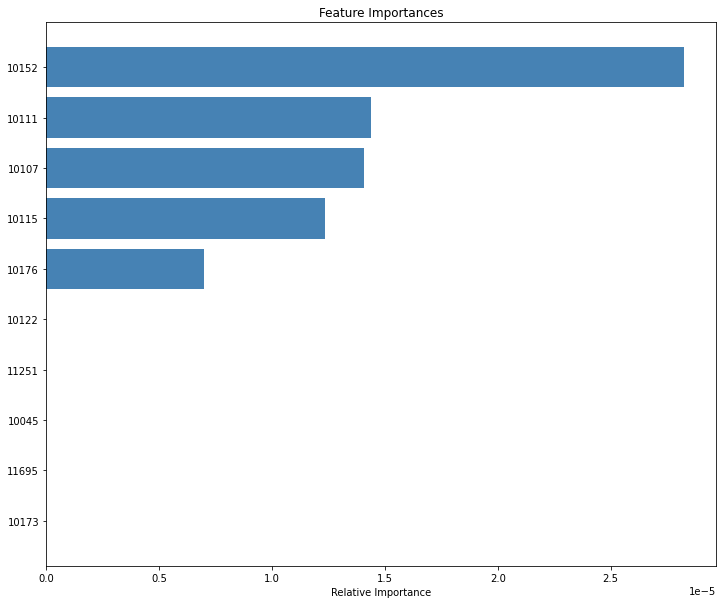

In [ ]:
importances = rfr.feature_importances_
indices = np.argsort(importances)[:10]

import matplotlib.pyplot as plt
plt.figure(figsize=(12,10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='steelblue', align='center')
plt.yticks(range(len(indices)), np.array(X.columns)[indices])
plt.xlabel('Relative Importance')
# plt.savefig("Feature_importance.png")

### Collision Count: Zipcode, Hour, Volume

In [ ]:
collision = df8.copy()
collision['Volume'] = pd.qcut(collision.Volume, q=[0, .25, .75, 1], labels=['Volume_S', 'Volume_M', 'Volume_L'])
collision['TMAX'] = pd.qcut(collision.TMAX, q=[0, .25, .75, 1], labels=['Temp_S', 'Temp_M', 'Temp_L'])
collision['PRCP'] = pd.qcut(collision.PRCP.rank(method='first'), q=[0, .25, .75, 1], labels=['PRCP_S', 'PRCP_M', 'PRCP_L'])
collision['SNOW'] = pd.qcut(collision.SNOW.rank(method='first'), q=[0, .25, .75, 1], labels=['SNOW_S', 'SNOW_M', 'SNOW_L'])

In [ ]:
collision.head(3)

,COLLISION_ID,Num_Injured,Num_Killed,Injury,Kill,ZIPCODE,DOW,Hour,ContriFactor,VehicleType,Volume,TMAX,PRCP,SNOW
0,4136992,0.0,0.0,0.0,0.0,11201,1,22,Passing or Lane Usage Improper,2.0,Volume_L,Temp_M,PRCP_S,SNOW_S
1,4135881,0.0,0.0,0.0,0.0,11362,1,8,Driver Inattention/Distraction,2.0,Volume_M,Temp_M,PRCP_S,SNOW_S
2,4135881,0.0,0.0,0.0,0.0,11362,1,8,Driver Inattention/Distraction,2.0,Volume_M,Temp_M,PRCP_S,SNOW_S


In [ ]:
collision_count = collision.groupby(['ZIPCODE','Hour','Volume']).agg({'COLLISION_ID':'count'})
collision_count = collision_count.rename(columns={'COLLISION_ID':'CollisionCount'}).reset_index()
collision_count.head()

,ZIPCODE,Hour,Volume,CollisionCount
0,10000,0,Volume_S,0
1,10000,0,Volume_M,0
2,10000,0,Volume_L,0
3,10000,1,Volume_S,0
4,10000,1,Volume_M,0


In [ ]:
colli_Dummy = collision_count.copy()
colli_Dummy = colli_Dummy.merge(pd.get_dummies(colli_Dummy['Hour']),left_index=True,right_index=True).drop(columns=['Hour'])
colli_Dummy = colli_Dummy.merge(pd.get_dummies(colli_Dummy['ZIPCODE']),left_index=True,right_index=True).drop(columns=['ZIPCODE'])
colli_Dummy = colli_Dummy.merge(pd.get_dummies(colli_Dummy['Volume']),left_index=True,right_index=True).drop(columns=['Volume'])
# colli_Dummy = colli_Dummy.merge(pd.get_dummies(colli_Dummy['VehicleType']),left_index=True,right_index=True).drop(columns=['VehicleType'])
colli_Dummy.head()

,CollisionCount,0,1,2,3,4,5,6,7,8,...,11436,11691,11692,11693,11694,11695,11697,Volume_S,Volume_M,Volume_L
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
X = colli_Dummy.iloc[:,1:]
y = colli_Dummy.iloc[:,0]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
rfr = RandomForestRegressor(random_state=42, bootstrap=True) 
rfr.fit(X_train, y_train)
rfr.score(X_test, y_test)

0.4200305604284367

In [ ]:
y_pred = rfr.predict(X_test)
RMSE=(np.mean(((y_pred - y_test))**2))**0.5
print(RMSE)

65.52882231143379


### Collision Count: Zipcode, Hour, Volume, TMAX

In [ ]:
collision = df8.copy()
collision['Volume'] = pd.qcut(collision.Volume, q=[0, .25, .75, 1], labels=['Volume_S', 'Volume_M', 'Volume_L'])
collision['TMAX'] = pd.qcut(collision.TMAX, q=[0, .25, .75, 1], labels=['Temp_S', 'Temp_M', 'Temp_L'])
collision['PRCP'] = pd.qcut(collision.PRCP.rank(method='first'), q=[0, .25, .75, 1], labels=['PRCP_S', 'PRCP_M', 'PRCP_L'])
collision['SNOW'] = pd.qcut(collision.SNOW.rank(method='first'), q=[0, .25, .75, 1], labels=['SNOW_S', 'SNOW_M', 'SNOW_L'])

In [ ]:
collision.head(3)

,COLLISION_ID,Num_Injured,Num_Killed,Injury,Kill,ZIPCODE,DOW,Hour,ContriFactor,VehicleType,Volume,TMAX,PRCP,SNOW
0,4136992,0.0,0.0,0.0,0.0,11201,1,22,Passing or Lane Usage Improper,2.0,Volume_L,Temp_M,PRCP_S,SNOW_S
1,4135881,0.0,0.0,0.0,0.0,11362,1,8,Driver Inattention/Distraction,2.0,Volume_M,Temp_M,PRCP_S,SNOW_S
2,4135881,0.0,0.0,0.0,0.0,11362,1,8,Driver Inattention/Distraction,2.0,Volume_M,Temp_M,PRCP_S,SNOW_S


In [ ]:
collision_count = collision.groupby(['ZIPCODE','Hour','Volume','TMAX']).agg({'COLLISION_ID':'count'})
collision_count = collision_count.rename(columns={'COLLISION_ID':'CollisionCount'}).reset_index()
collision_count.head()

,ZIPCODE,Hour,Volume,TMAX,CollisionCount
0,10000,0,Volume_S,Temp_S,0
1,10000,0,Volume_S,Temp_M,0
2,10000,0,Volume_S,Temp_L,0
3,10000,0,Volume_M,Temp_S,0
4,10000,0,Volume_M,Temp_M,0


In [ ]:
colli_Dummy = collision_count.copy()
colli_Dummy = colli_Dummy.merge(pd.get_dummies(colli_Dummy['Hour']),left_index=True,right_index=True).drop(columns=['Hour'])
colli_Dummy = colli_Dummy.merge(pd.get_dummies(colli_Dummy['ZIPCODE']),left_index=True,right_index=True).drop(columns=['ZIPCODE'])
colli_Dummy = colli_Dummy.merge(pd.get_dummies(colli_Dummy['Volume']),left_index=True,right_index=True).drop(columns=['Volume'])
colli_Dummy = colli_Dummy.merge(pd.get_dummies(colli_Dummy['TMAX']),left_index=True,right_index=True).drop(columns=['TMAX'])
# colli_Dummy = colli_Dummy.merge(pd.get_dummies(colli_Dummy['VehicleType']),left_index=True,right_index=True).drop(columns=['VehicleType'])
colli_Dummy.head()

,CollisionCount,0,1,2,3,4,5,6,7,8,...,11693,11694,11695,11697,Volume_S,Volume_M,Volume_L,Temp_S,Temp_M,Temp_L
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0


In [ ]:
X = colli_Dummy.iloc[:,1:]
y = colli_Dummy.iloc[:,0]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
rfr = RandomForestRegressor(random_state=42, bootstrap=True) 
rfr.fit(X_train, y_train)
rfr.score(X_test, y_test)

0.48208812867281925

In [ ]:
y_pred = rfr.predict(X_test)
RMSE=(np.mean(((y_pred - y_test))**2))**0.5
print(RMSE)

22.4520468146138


## Injury & Kill

### Dataset: Injury & Kill

In [ ]:
df_Dummy = df8.copy()
df_Dummy = df_Dummy.merge(pd.get_dummies(df_Dummy['DOW']),left_index=True,right_index=True).drop(columns=['DOW'])
df_Dummy = df_Dummy.merge(pd.get_dummies(df_Dummy['Hour']),left_index=True,right_index=True).drop(columns=['Hour'])
df_Dummy = df_Dummy.merge(pd.get_dummies(df_Dummy['VehicleType']),left_index=True,right_index=True).drop(columns=['VehicleType'])
df_Dummy = df_Dummy.merge(pd.get_dummies(df_Dummy['ContriFactor']),left_index=True,right_index=True).drop(columns=['ContriFactor'])
df_Dummy = df_Dummy.merge(pd.get_dummies(df_Dummy['ZIPCODE']),left_index=True,right_index=True).drop(columns=['ZIPCODE'])
df_Dummy.head()

,COLLISION_ID,Num_Injured,Num_Killed,Injury,Kill,Volume,TMAX,PRCP,SNOW,0_x,1_x,2_x,3_x,4_x,5_x,6_x,0_y,1_y,2_y,3_y,4_y,5_y,6_y,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,1.0,2.0,3.0,4.0,5.0,Accelerator Defective,Aggressive Driving/Road Rage,Alcohol Involvement,Animals Action,Backing Unsafely,Brakes Defective,Cell Phone (hand-Held),Cell Phone (hands-free),Driver Inattention/Distraction,Driver Inexperience,Driverless/Runaway Vehicle,Drugs (illegal),Eating or Drinking,Failure to Keep Right,Failure to Yield Right-of-Way,Fatigued/Drowsy,Fell Asleep,Following Too Closely,Glare,Headlights Defective,Illnes,Lane Marking Improper/Inadequate,Listening/Using Headphones,Lost Consciousness,Obstruction/Debris,Other Electronic Device,Other Lighting Defects,Other Vehicular,Outside Car Distraction,Oversized Vehicle,Passenger Distraction,Passing Too Closely,Passing or Lane Usage Improper,Pavement Defective,Pavement Slippery,Pedestrian/Bicyclist/Other Pedestrian Error/Confusion,Physical Disability,Prescription Medication,Reaction to Uninvolved Vehicle,Shoulders Defective/Improper,Steering Failure,Texting,Tinted Windows,Tire Failure/Inadequate,Tow Hitch Defective,Traffic Control Device Improper/Non-Working,Traffic Control Disregarded,Turning Improperly,Unsafe Lane Changing,Unsafe Speed,Using On Board Navigation Device,Vehicle Vandalism,View Obstructed/Limited,Windshield Inadequate,10001,10002,10003,10004,10007,10009,10010,10011,10012,10013,10014,10016,10017,10018,10019,10020,10021,10022,10023,10024,10025,10026,10027,10028,10029,10030,10031,10032,10033,10034,10035,10036,10038,10039,10040,10065,10069,10107,10112,10128,10176,10282,10301,10302,10304,10305,10306,10309,10310,10312,10314,10451,10452,10453,10454,10455,10456,10457,10458,10459,10460,10461,10462,10463,10464,10465,10466,10467,10468,10469,10470,10471,10472,10473,10475,11001,11040,11101,11103,11104,11106,11201,11203,11204,11205,11206,11207,11208,11210,11211,11212,11213,11214,11215,11216,11217,11218,11219,11220,11221,11222,11223,11224,11225,11226,11228,11230,11231,11232,11233,11234,11235,11236,11237,11238,11249,11354,11355,11358,11361,11362,11364,11365,11366,11367,11368,11369,11370,11372,11373,11374,11375,11377,11378,11379,11385,11411,11412,11413,11414,11415,11416,11417,11418,11422,11423,11426,11427,11430,11432,11433,11434,11435,11436,11691,11693
1,4136992,0.0,0.0,0.0,0.0,149350.0,71,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,4135881,0.0,0.0,0.0,0.0,32775.0,71,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4135881,0.0,0.0,0.0,0.0,32775.0,71,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4136313,1.0,0.0,1.0,0.0,175863.0,71,0.0,0.0,0,1,0,0,0,0,0,0,0,

In [ ]:
scaler = MinMaxScaler()
df_Dummy[['Volume','TMAX','PRCP','SNOW']] = scaler.fit_transform(df_Dummy[['Volume','TMAX','PRCP','SNOW']])

In [ ]:
df_Dummy.head()

,COLLISION_ID,Num_Injured,Num_Killed,Injury,Kill,Volume,TMAX,PRCP,SNOW,0_x,1_x,2_x,3_x,4_x,5_x,6_x,0_y,1_y,2_y,3_y,4_y,5_y,6_y,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,1.0,2.0,3.0,4.0,5.0,Accelerator Defective,Aggressive Driving/Road Rage,Alcohol Involvement,Animals Action,Backing Unsafely,Brakes Defective,Cell Phone (hand-Held),Cell Phone (hands-free),Driver Inattention/Distraction,Driver Inexperience,Driverless/Runaway Vehicle,Drugs (illegal),Eating or Drinking,Failure to Keep Right,Failure to Yield Right-of-Way,Fatigued/Drowsy,Fell Asleep,Following Too Closely,Glare,Headlights Defective,Illnes,Lane Marking Improper/Inadequate,Listening/Using Headphones,Lost Consciousness,Obstruction/Debris,Other Electronic Device,Other Lighting Defects,Other Vehicular,Outside Car Distraction,Oversized Vehicle,Passenger Distraction,Passing Too Closely,Passing or Lane Usage Improper,Pavement Defective,Pavement Slippery,Pedestrian/Bicyclist/Other Pedestrian Error/Confusion,Physical Disability,Prescription Medication,Reaction to Uninvolved Vehicle,Shoulders Defective/Improper,Steering Failure,Texting,Tinted Windows,Tire Failure/Inadequate,Tow Hitch Defective,Traffic Control Device Improper/Non-Working,Traffic Control Disregarded,Turning Improperly,Unsafe Lane Changing,Unsafe Speed,Using On Board Navigation Device,Vehicle Vandalism,View Obstructed/Limited,Windshield Inadequate,10001,10002,10003,10004,10007,10009,10010,10011,10012,10013,10014,10016,10017,10018,10019,10020,10021,10022,10023,10024,10025,10026,10027,10028,10029,10030,10031,10032,10033,10034,10035,10036,10038,10039,10040,10065,10069,10107,10112,10128,10176,10282,10301,10302,10304,10305,10306,10309,10310,10312,10314,10451,10452,10453,10454,10455,10456,10457,10458,10459,10460,10461,10462,10463,10464,10465,10466,10467,10468,10469,10470,10471,10472,10473,10475,11001,11040,11101,11103,11104,11106,11201,11203,11204,11205,11206,11207,11208,11210,11211,11212,11213,11214,11215,11216,11217,11218,11219,11220,11221,11222,11223,11224,11225,11226,11228,11230,11231,11232,11233,11234,11235,11236,11237,11238,11249,11354,11355,11358,11361,11362,11364,11365,11366,11367,11368,11369,11370,11372,11373,11374,11375,11377,11378,11379,11385,11411,11412,11413,11414,11415,11416,11417,11418,11422,11423,11426,11427,11430,11432,11433,11434,11435,11436,11691,11693
1,4136992,0.0,0.0,0.0,0.0,0.356775,0.698795,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,4135881,0.0,0.0,0.0,0.0,0.077998,0.698795,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4135881,0.0,0.0,0.0,0.0,0.077998,0.698795,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4136313,1.0,0.0,1.0,0.0,0.420178,0.698795,

In [ ]:
# from google.colab import files
df_Dummy.to_csv('FinalDataset_DirectUse.csv', index=False)
files.download('FinalDataset_DirectUse.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
final = df_Dummy.copy()

In [ ]:
final.head()

,COLLISION_ID,Num_Injured,Num_Killed,Injury,Kill,Volume,TMAX,PRCP,SNOW,0_x,1_x,2_x,3_x,4_x,5_x,6_x,0_y,1_y,2_y,3_y,4_y,5_y,6_y,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,1.0,2.0,3.0,4.0,5.0,Accelerator Defective,Aggressive Driving/Road Rage,Alcohol Involvement,Animals Action,Backing Unsafely,Brakes Defective,Cell Phone (hand-Held),Cell Phone (hands-free),Driver Inattention/Distraction,Driver Inexperience,Driverless/Runaway Vehicle,Drugs (illegal),Eating or Drinking,Failure to Keep Right,Failure to Yield Right-of-Way,Fatigued/Drowsy,Fell Asleep,Following Too Closely,Glare,Headlights Defective,Illnes,Lane Marking Improper/Inadequate,Listening/Using Headphones,Lost Consciousness,Obstruction/Debris,Other Electronic Device,Other Lighting Defects,Other Vehicular,Outside Car Distraction,Oversized Vehicle,Passenger Distraction,Passing Too Closely,Passing or Lane Usage Improper,Pavement Defective,Pavement Slippery,Pedestrian/Bicyclist/Other Pedestrian Error/Confusion,Physical Disability,Prescription Medication,Reaction to Uninvolved Vehicle,Shoulders Defective/Improper,Steering Failure,Texting,Tinted Windows,Tire Failure/Inadequate,Tow Hitch Defective,Traffic Control Device Improper/Non-Working,Traffic Control Disregarded,Turning Improperly,Unsafe Lane Changing,Unsafe Speed,Using On Board Navigation Device,Vehicle Vandalism,View Obstructed/Limited,Windshield Inadequate,10001,10002,10003,10004,10007,10009,10010,10011,10012,10013,10014,10016,10017,10018,10019,10020,10021,10022,10023,10024,10025,10026,10027,10028,10029,10030,10031,10032,10033,10034,10035,10036,10038,10039,10040,10065,10069,10107,10112,10128,10176,10282,10301,10302,10304,10305,10306,10309,10310,10312,10314,10451,10452,10453,10454,10455,10456,10457,10458,10459,10460,10461,10462,10463,10464,10465,10466,10467,10468,10469,10470,10471,10472,10473,10475,11001,11040,11101,11103,11104,11106,11201,11203,11204,11205,11206,11207,11208,11210,11211,11212,11213,11214,11215,11216,11217,11218,11219,11220,11221,11222,11223,11224,11225,11226,11228,11230,11231,11232,11233,11234,11235,11236,11237,11238,11249,11354,11355,11358,11361,11362,11364,11365,11366,11367,11368,11369,11370,11372,11373,11374,11375,11377,11378,11379,11385,11411,11412,11413,11414,11415,11416,11417,11418,11422,11423,11426,11427,11430,11432,11433,11434,11435,11436,11691,11693
1,4136992,0.0,0.0,0.0,0.0,0.356775,0.698795,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,4135881,0.0,0.0,0.0,0.0,0.077998,0.698795,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4135881,0.0,0.0,0.0,0.0,0.077998,0.698795,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4136313,1.0,0.0,1.0,0.0,0.420178,0.698795,

### Number Injuries

In [ ]:
X = final.iloc[:,5:]
y = final.iloc[:,1]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, shuffle=False)

In [ ]:
rfr = RandomForestRegressor(random_state=42, bootstrap=True) 
rfr.fit(X_train, y_train)
rfr.score(X_test, y_test)

KeyboardInterrupt: ignored

In [ ]:
y_pred = rfr.predict(X_test)
RMSE=(np.mean(((y_pred - y_test))**2))**0.5
print(RMSE)

In [ ]:
rfr.get_params()

In [ ]:
importances = rfr.feature_importances_
indices = np.argsort(importances)[:10]

import matplotlib.pyplot as plt
plt.figure(figsize=(12,10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='steelblue', align='center')
plt.yticks(range(len(indices)), np.array(X.columns)[indices])
plt.xlabel('Relative Importance')
# plt.savefig("Feature_importance.png")

### Number Killed

In [ ]:
X = final.iloc[:,5:]
y = final.iloc[:,2]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
rfr = RandomForestRegressor(random_state=42, bootstrap=True) 
rfr.fit(X_train, y_train)
rfr.score(X_test, y_test)

In [ ]:
y_pred = rfr.predict(X_test)
RMSE=(np.mean(((y_pred - y_test))**2))**0.5
print(RMSE)

In [ ]:
rfr.get_params()

In [ ]:
importances = rfr.feature_importances_
indices = np.argsort(importances)[:10]

import matplotlib.pyplot as plt
plt.figure(figsize=(12,10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='steelblue', align='center')
plt.yticks(range(len(indices)), np.array(X.columns)[indices])
plt.xlabel('Relative Importance')
# plt.savefig("Feature_importance.png")

### Whether Injured

In [ ]:
X = final.iloc[:,5:]
y = final.iloc[:,3]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
rfr = RandomForestClassifier(max_depth=2, random_state=42)
rfr.fit(X_train, y_train)
rfr.score(X_test, y_test)

0.781695258517989

In [ ]:
rfr.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 2,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

### Whether Killed

In [ ]:
X = final.iloc[:,5:]
y = final.iloc[:,4]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
rfr = RandomForestClassifier(max_depth=2, random_state=42)
rfr.fit(X_train, y_train)
rfr.score(X_test, y_test)

0.9990052418394091

In [ ]:
rfr.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

# Trash Bin

In [ ]:
X = df6_Hour_Dummy.iloc[:,5:]
y = df6_Hour_Dummy.iloc[:,3]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
rfr = RandomForestRegressor(random_state=42, bootstrap=True) 
rfr.fit(X_train, y_train)
rfr.score(X_test, y_test)

0.38948591988708114

In [ ]:
y_pred = rfr.predict(X_test)
RMSE=(np.mean(((y_pred - y_test))**2))**0.5
print(RMSE)

0.2400744500452319


In [ ]:
rfr.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

Text(0.5, 0, 'Relative Importance')

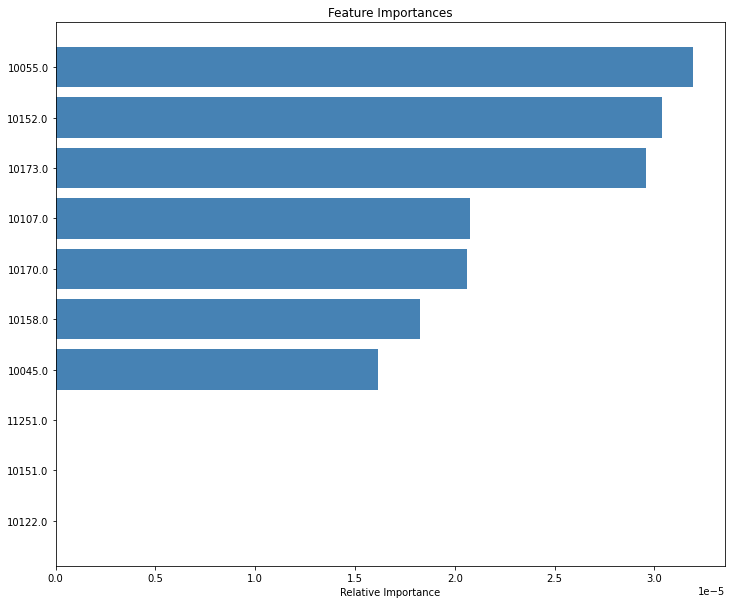

In [ ]:
importances = rfr.feature_importances_
indices = np.argsort(importances)[:10]

import matplotlib.pyplot as plt
plt.figure(figsize=(12,10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='steelblue', align='center')
plt.yticks(range(len(indices)), np.array(X.columns)[indices])
plt.xlabel('Relative Importance')
# plt.savefig("Feature_importance.png")

In [ ]:
X = df6_Hour_Dummy.iloc[:,3:]
y = df6_Hour_Dummy.iloc[:,2]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, shuffle=False)

In [ ]:
rfr = RandomForestRegressor(random_state=42, bootstrap=True) 
rfr.fit(X_train, y_train)
rfr.score(X_test, y_test)

-0.28112197098448943

In [ ]:
y_pred = rfr.predict(X_test)
RMSE=(np.mean(((y_pred - y_test))**2))**0.5
print(RMSE)

0.03177311319713962


In [ ]:
rfr.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

Text(0.5, 0, 'Relative Importance')

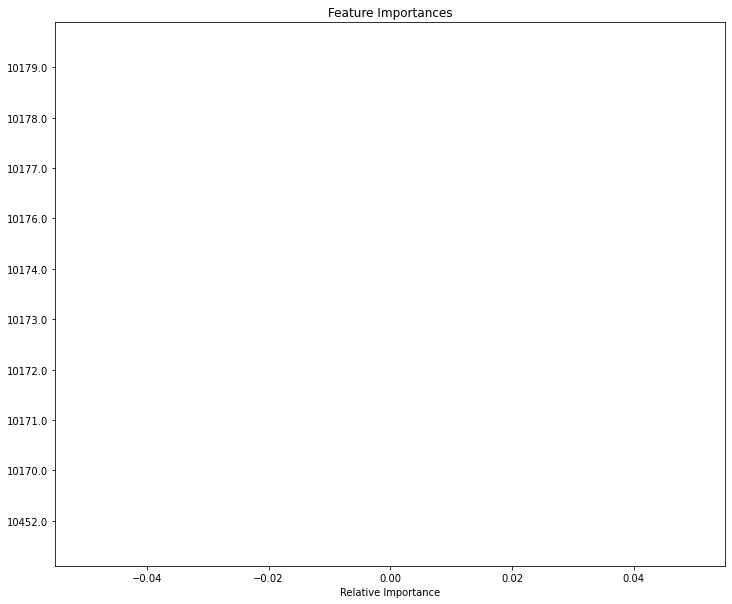

In [ ]:
importances = rfr.feature_importances_
indices = np.argsort(importances)[:10]

import matplotlib.pyplot as plt
plt.figure(figsize=(12,10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='steelblue', align='center')
plt.yticks(range(len(indices)), np.array(X.columns)[indices])
plt.xlabel('Relative Importance')
# plt.savefig("Feature_importance.png")

In [ ]:
df6_DOW_Dummy.head()

,CollisionCount,InjureRate,KillRate,1_x,2_x,3_x,4_x,5_x,0,1_y,...,11433.0,11434.0,11435.0,11436.0,11691.0,11692.0,11693.0,11694.0,11695.0,11697.0
0,2,1.000000,0.0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,25,0.320000,0.0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,3,0.666667,0.0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,7,1.000000,0.0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,31,0.193548,0.0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# f = lambda s: 1 if s["天数"]>=15 else 0
# f = lambda s: 1 if s["天数"]>=15 else s["天数"]
# result["label"] = result.apply(f, axis=1)
# result["label"].value_counts()

In [ ]:
df5 = []

for i in range(len(df4)):
  if df4['VehicleType'][i] in Individual:
    df4['VehicleType'][i] = 1
    df5.append([df4['COLLISION_ID'][i], df4['ZIPCODE'][i], df4['Year'][i], df4['Month'][i], df4['DOW'][i], df4['Day'][i], df4['Hour'][i], df4['VehicleType'][i], df4['Num_Injured'][i], df4['Num_Killed'][i]])
  if df4['VehicleType'][i] in Small:
    df4['VehicleType'][i] = 2
    df5.append([df4['COLLISION_ID'][i], df4['ZIPCODE'][i], df4['Year'][i], df4['Month'][i], df4['DOW'][i], df4['Day'][i], df4['Hour'][i], df4['VehicleType'][i], df4['Num_Injured'][i], df4['Num_Killed'][i]])
  if df4['VehicleType'][i] in Median:
    df4['VehicleType'][i] = 3
    df5.append([df4['COLLISION_ID'][i], df4['ZIPCODE'][i], df4['Year'][i], df4['Month'][i], df4['DOW'][i], df4['Day'][i], df4['Hour'][i], df4['VehicleType'][i], df4['Num_Injured'][i], df4['Num_Killed'][i]])
  if df4['VehicleType'][i] in Large:
    df4['VehicleType'][i] = 4
    df5.append([df4['COLLISION_ID'][i], df4['ZIPCODE'][i], df4['Year'][i], df4['Month'][i], df4['DOW'][i], df4['Day'][i], df4['Hour'][i], df4['VehicleType'][i], df4['Num_Injured'][i], df4['Num_Killed'][i]])
  if df4['VehicleType'][i] in ExtraLarge:
    df4['VehicleType'][i] = 5
    df5.append([df4['COLLISION_ID'][i], df4['ZIPCODE'][i], df4['Year'][i], df4['Month'][i], df4['DOW'][i], df4['Day'][i], df4['Hour'][i], df4['VehicleType'][i], df4['Num_Injured'][i], df4['Num_Killed'][i]])


In [ ]:
df6 = pd.DataFrame(df5, columns=['COLLISION_ID', 'ZIPCODE', 'Year', 'Month', 'DOW', 'Day', 'Hour', 'VehicleType', 'Num_Injured', 'Num_Killed'])
df6.head()

,COLLISION_ID,ZIPCODE,Year,Month,DOW,Day,Hour,VehicleType,Num_Injured,Num_Killed
0,4136992,11201.0,2019,5,1,141,22,2,0.0,0.0
1,4408441,10019.0,2020,4,4,108,1,2,1.0,0.0
2,4412513,11436.0,2020,5,5,123,17,2,0.0,0.0
3,4412513,11436.0,2020,5,5,123,17,3,0.0,0.0
4,4411898,10036.0,2020,12,3,366,12,2,0.0,0.0


In [ ]:
## Contributing Factor
# drivers' issue: 1
# cars' issue: 2
# others(espically road): 3

factor_dict = {
    'Passing or Lane Usage Improper':1, 'Driver Inattention/Distraction':2,
       'Unsafe Lane Changing':3, 'Pavement Slippery':4, 'Other Vehicular':3,
       'Driver Inexperience':1, 'Failure to Yield Right-of-Way':3,
       'Backing Unsafely':1, 'Turning Improperly':1,
       'Traffic Control Disregarded':1, 'Oversized Vehicle':2, 'Unsafe Speed':1,
       'Passenger Distraction':3, 'Passing Too Closely':1,
       'Obstruction/Debris':3, 'Aggressive Driving/Road Rage':1,
       'Following Too Closely':1, 'Brakes Defective':2, 'Glare':2,
       'Alcohol Involvement':1, 'Physical Disability':1,
       'Reaction to Uninvolved Vehicle':3, 'Tire Failure/Inadequate':2,
       'Pedestrian/Bicyclist/Other Pedestrian Error/Confusion':3,
       'Driverless/Runaway Vehicle':1, 'Cell Phone (hand-Held)':1,
       'Tow Hitch Defective':2, 'View Obstructed/Limited':2,
       'Drugs (illegal)':1, 'Failure to Keep Right':1, 'Fatigued/Drowsy':1,
       'Fell Asleep':1, 'Steering Failure':1, 'Lost Consciousness',
       'Prescription Medication',
       'Traffic Control Device Improper/Non-Working',
       'Pavement Defective', 'Tinted Windows', 'Outside Car Distraction',
       'Listening/Using Headphones', 'Accelerator Defective', 'Illnes',
       'Lane Marking Improper/Inadequate', 'Animals Action',
       'Windshield Inadequate', 'Using On Board Navigation Device',
       'Other Lighting Defects', 'Other Electronic Device',
       'Vehicle Vandalism', 'Shoulders Defective/Improper',
       'Headlights Defective', 'Eating or Drinking',
       'Cell Phone (hands-free)', 'Texting'
}

factor_dict = {'FollowingTooClosely':1,
       'DriverInattention/Distraction':1, 'PassingTooClosely':1,
       'PassingorLaneUsageImproper':1, 'DriverInexperience':1,
       'FailuretoYieldRight-of-Way':1, 'TurningImproperly':1, 'UnsafeSpeed':1,
       'BackingUnsafely':1, 'SteeringFailure':1, 'TrafficControlDisregarded':1,
       'Drugs(illegal)':1, 'ReactiontoUninvolvedVehicle':1,
       'ViewObstructed/Limited':1,
       'Pedestrian/Bicyclist/OtherPedestrianError/Confusion':1,
       'AlcoholInvolvement':1, 'PavementSlippery':3, 'BrakesDefective':2,
       'OversizedVehicle':2, 'AnimalsAction':3, 'UnsafeLaneChanging':1,
       'OutsideCarDistraction':3, 'Illnes':1, 'OtherVehicular':2,
       'AggressiveDriving/RoadRage':1, 'FellAsleep':1,
       'TireFailure/Inadequate':2, 'PavementDefective':3, 'nan':3,
       'LostConsciousness':1, 'AcceleratorDefective':2,
       'PassengerDistraction':3, 'Glare':1, 'EatingorDrinking':1,
       'CellPhone(hands-free)':1, 'LaneMarkingImproper/Inadequate':3,
       'Obstruction/Debris':1, 'FailuretoKeepRight':3,
       'UsingOnBoardNavigationDevice':1, 'Fatigued/Drowsy':1,
       'PhysicalDisability':1, 'CellPhone(hand-Held)':1,
       'HeadlightsDefective':2, 'TintedWindows':2, 'VehicleVandalism':2,
       'Driverless/RunawayVehicle':1, 'PrescriptionMedication':1, 'Texting':1,
       'TrafficControlDeviceImproper/Non-Working':3, 'TowHitchDefective':2,
       'ShouldersDefective/Improper':1, 'WindshieldInadequate':2,
       'OtherLightingDefects':1, 'OtherElectronicDevice':1, '80':3,
       'Listening/UsingHeadphones':1, 'ReactiontoOtherUninvolvedVehicle':1,
       '1':3, 'Drugs(Illegal)':1, 'Illness':1, 'CellPhone(hand-held)':1}

df7['ContriFactor'] = df7['ContriFactor'].apply(lambda x: factor_dict.get(x))

In [ ]:
tree_param_grid = {'min_samples_split':list((128,256,512)),'n_estimators':list((100,150)),"max_depth":list((5,10,20))}

grid = GridSearchCV(RandomForestRegressor(), param_grid=tree_param_grid, cv=5, verbose=1)
grid.fit(X_train, y_train)
grid.cv_results_, grid.best_params_, grid.best_score_

In [ ]:
df6_Hour = df6.groupby(['ZIPCODE','Hour','VehicleType']).agg({'COLLISION_ID':'count','Injury':'sum','Kill':'sum'}).rename(columns={'COLLISION_ID':'CollisionCount'}).reset_index()
df6_Hour = df6_Hour.drop(['Injury', 'Kill'], axis = 1)
df6_Hour.head()

In [ ]:
df6_DOW = df6.groupby(['ZIPCODE','DOW','VehicleType']).agg({'COLLISION_ID':'count','Injury':'sum','Kill':'sum'}).rename(columns={'COLLISION_ID':'CollisionCount'}).reset_index()
df6_DOW['InjureRate'] = df6_DOW['Injury'] / df6_DOW['CollisionCount']
df6_DOW['KillRate'] = df6_DOW['Kill'] / df6_DOW['CollisionCount']
df6_DOW.head()

,ZIPCODE,DOW,VehicleType,CollisionCount,Injury,Kill,InjureRate,KillRate
0,10000.0,0,1,2,2.0,0.0,1.000000,0.0
1,10000.0,0,2,25,8.0,0.0,0.320000,0.0
2,10000.0,0,3,3,2.0,0.0,0.666667,0.0
3,10000.0,1,1,7,7.0,0.0,1.000000,0.0
4,10000.0,1,2,31,6.0,0.0,0.193548,0.0


In [ ]:
df6_Hour_Dummy = df6_Hour.copy()
df6_Hour_Dummy = df6_Hour_Dummy.drop(['Injury', 'Kill'], axis = 1)
df6_Hour_Dummy = df6_Hour_Dummy.merge(pd.get_dummies(df6_Hour['VehicleType']),left_index=True,right_index=True).drop(columns=["VehicleType"])
df6_Hour_Dummy = df6_Hour_Dummy.merge(pd.get_dummies(df6_Hour['Hour']),left_index=True,right_index=True).drop(columns=["Hour"])
df6_Hour_Dummy = df6_Hour_Dummy.merge(pd.get_dummies(df6_Hour['ZIPCODE']),left_index=True,right_index=True).drop(columns=["ZIPCODE"])
df6_Hour_Dummy.head()